**Regresi Sederhana**



In [35]:
#Menghubungkan colab dengan gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
#Memanggil dataset dengan gdrive
path = "/content/gdrive/MyDrive/Praktikum_MachineLearning/Praktikum03"

In [37]:
#Membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + "/data/socr.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [38]:
#Mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [39]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [40]:
#2 Pra Proses Data

df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
        .rename(columns={"Height(Inches)": "tinggi_cm",
                         "Weight(Pounds)": "berat_kg"})
        .assign(
            tinggi_cm=lambda d: d["tinggi_cm"]* 2.54,
            berat_kg=lambda d: d["berat_kg"]* 0.45359237
        )
        .round({"tinggi_cm": 2, "berat_kg": 2})
    ).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [41]:
from sklearn.model_selection import train_test_split

X = df1[["tinggi_cm"]]
y = df1["berat_kg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

print('Jumlah data training ', len(X_train))
print('Jumlah data testing ', len(X_test))

Jumlah data training  20000
Jumlah data testing  5000


In [42]:
from sklearn.linear_model import LinearRegression

#buat objek instan dari class LinearRegression bernama model
model = LinearRegression()

#Jalankan training
model.fit(X_train, y_train)

LinearRegression()

In [43]:
#evaluasi model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):      ", model.intercept_)
print("R2 (test):          ", r2)
print("MAE (kg):           ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):          ", rmse)

Koefisien (kg per cm): 0.5518232618278286
Intersep (kg):       -37.657088783833586
R2 (test):           0.24989263013277574
MAE (kg):            3.6704107898943548
RMSE (kg):           4.609006140308042


In [44]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.657


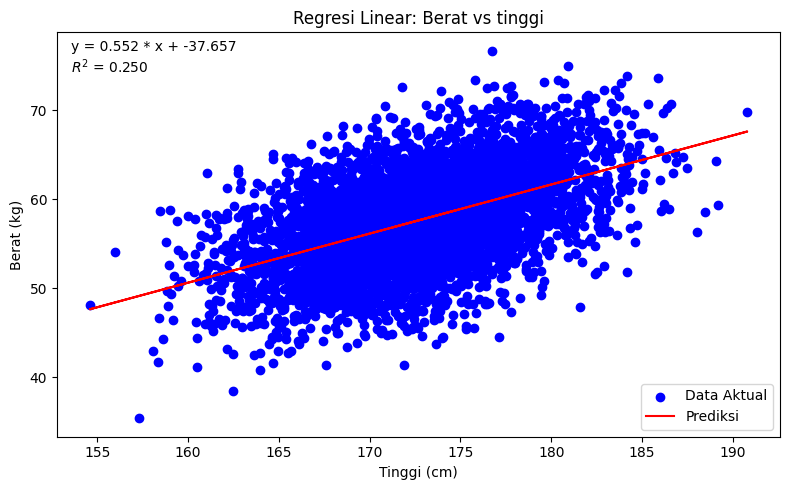

In [45]:
import matplotlib.pyplot as plt

#Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual')

# Garis regresi
plt.plot(X_test, y_pred, color='red', label='Prediksi')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')
plt.title('Regresi Linear: Berat vs tinggi')
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
y_pred_test = model.predict(X_test)

#Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    'Tinggi (cm)': X_test['tinggi_cm'].to_numpy(),
    'Berat Aktual (kg)': y_test.to_numpy(),
    'Berat Prediksi (kg)': y_pred_test,
})

#1.) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

#2.) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) #antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


**Data Testing Mahasiswa**

In [47]:
#Menghubungkan colab dengan gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
#Memanggil dataset dengan gdrive
path = "/content/gdrive/MyDrive/Praktikum_MachineLearning/Praktikum03"

In [28]:
#Membaca file csv menggunakan pandas
import pandas as pd

# 1. Baca file Excel
df = pd.read_excel("/content/gdrive/MyDrive/Praktikum_MachineLearning/Praktikum03/data/mlsenin.xlsx")

# 2. Simpan jadi file CSV
df.to_csv("/content/gdrive/MyDrive/Praktikum_MachineLearning/Praktikum03/data/mlsenin.csv", index=False)


In [30]:
#Ambil X_testing

df1 = pd.read_csv(path + "/data/mlsenin.csv", sep=",")
df1

,No,Nama,tinggi_cm,berat_actual
0,1,Muflih,153,43.5
1,2,Anis,157,46.5
2,3,Autumm,170,75.2
3,4,Hasna,150,48.9
4,5,Azis,163,52.6


In [31]:
#Ambil X_testing
X_testing = df1[["tinggi_cm"]]
X_testing

,tinggi_cm
0,153
1,157
2,170
3,150
4,163


In [48]:
data = pd.read_csv("/content/gdrive/MyDrive/Praktikum_MachineLearning/Praktikum03/data/mlsenin.csv", sep=",")

y_pred = model.predict(data[["tinggi_cm"]])
data['prediksi (kg)']=y_pred
data

,No,Nama,tinggi_cm,berat_actual,prediksi (kg)
0,1,Muflih,153,43.5,46.771870
1,2,Anis,157,46.5,48.979163
2,3,Autumm,170,75.2,56.152866
3,4,Hasna,150,48.9,45.116400
4,5,Azis,163,52.6,52.290103


In [51]:
y_pred = model.predict(data[['tinggi_cm']])
data['prediksi (kg)'] = y_pred
data["Selisih error (kg)"] = data["prediksi (kg)"] - data["berat_actual"]
denom = data["berat_actual"].replace(0, np.nan)
data["akurasi (%)"] = (1 - (data["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
data

,No,Nama,tinggi_cm,berat_actual,prediksi (kg),Selisih error (kg),akurasi (%)
0,1,Muflih,153,43.5,46.771870,3.271870,92.478459
1,2,Anis,157,46.5,48.979163,2.479163,94.668466
2,3,Autumm,170,75.2,56.152866,-19.047134,74.671364
3,4,Hasna,150,48.9,45.116400,-3.783600,92.262578
4,5,Azis,163,52.6,52.290103,-0.309897,99.410842


In [52]:
data.describe()

,No,tinggi_cm,berat_actual,prediksi (kg),Selisih error (kg),akurasi (%)
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,158.600000,53.340000,49.862081,-3.477919,90.698342
std,1.581139,8.018728,12.666215,4.424921,9.132042,9.409426
min,1.000000,150.000000,43.500000,45.116400,-19.047134,74.671364
25%,2.000000,153.000000,46.500000,46.771870,-3.783600,92.262578
50%,3.000000,157.000000,48.900000,48.979163,-0.309897,92.478459
75%,4.000000,163.000000,52.600000,52.290103,2.479163,94.668466
max,5.000000,170.000000,75.200000,56.152866,3.271870,99.410842
